# Customer Churn Prediction

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_json("data/challenge.json").dropna()

df.head()

,branch_id,customer_code,group_code,is_churn,item_code,item_total_price,order_id,quantity,register_date,sales_channel,segment_code,seller_code,total_price,unit_price
0,0,143,0,0.0,854,292.91,21804,10,2017-11-10T00:00:00Z,0,0,190,1613.53,25.04
1,0,433,0,0.0,246,287.19,5486,20,2011-05-16T00:00:00Z,1,5,153,11163.69,12.33
2,0,486,0,0.0,1420,184.84,22662,12,2018-01-24T00:00:00Z,0,0,166,6432.12,12.80
3,0,107,0,0.0,1963,189.18,3956,18,2010-07-28T00:00:00Z,1,0,156,831.82,10.51
4,0,768,0,0.0,1786,66.87,4730,5,2010-12-17T00:00:00Z,1,0,218,1736.48,11.82


In [3]:
df.nunique()

branch_id               1
customer_code         818
group_code              3
is_churn                2
item_code            2968
item_total_price    55100
order_id            24380
quantity              290
register_date        3119
sales_channel         106
segment_code            7
seller_code           289
total_price         22499
unit_price          19756
dtype: int64

## Feature engineering 

For each customer we extract the following features:

- The **order_id** of the first order and the associated **seller_code**.
- The **item_code** of the last item.
- The mean **quantity**.
- The mean **item_total_price**.
- The mean **total_price**.
- The mean **unit_price**.

In [4]:
columns = ['customer_code',
           'is_churn',
           'item_code',
           'item_total_price',
           'order_id',
           'quantity',
           'seller_code',
           'total_price',
           'unit_price',
          ]

dic = {'is_churn': 'first',
       'item_code': 'last',
       'item_total_price': 'mean',
       'order_id': 'first',
       'quantity': 'mean',
       'seller_code': 'first',
       'total_price': 'mean',
       'unit_price': 'mean',
      }

df1 = df[columns]\
    .sort_values(['order_id', 'item_code'])\
    .groupby('customer_code')\
    .agg(dic)

df1.head()

,is_churn,item_code,item_total_price,order_id,quantity,seller_code,total_price,unit_price
customer_code,,,,,,,,
0,0.0,2876,471.076369,967,9.307263,153,4389.258436,67.850670
1,0.0,2673,192.872654,199,6.830149,154,2300.680764,54.524862
2,0.0,2862,317.706743,55,10.436482,208,2741.164300,48.270912
3,0.0,1781,604.128283,206,15.943307,134,8035.883764,78.777307
4,0.0,2630,345.650797,190,14.561462,3,3577.577608,39.980399


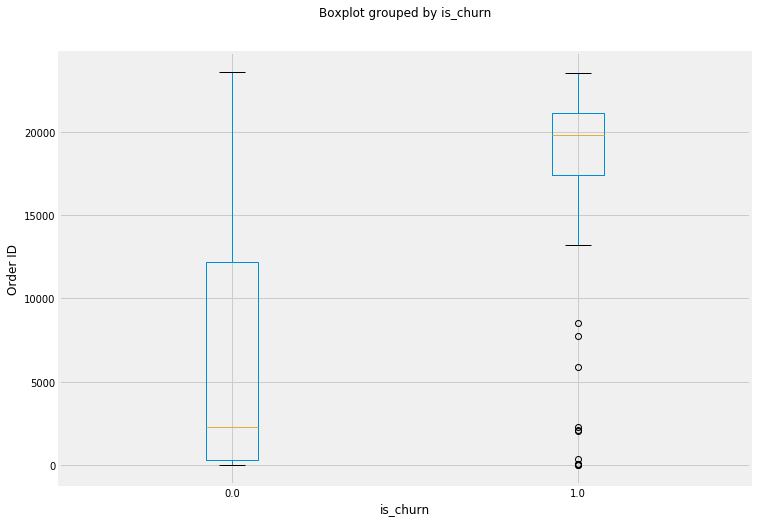

In [5]:
df1.boxplot(column='order_id', by='is_churn', figsize=(12,8))
plt.title('')
plt.ylabel('Order ID');

## Classification Model

- Define target class **y** and the matrix of features **X** 
- Scale features before training the classifier

In [6]:
clf = make_pipeline(StandardScaler(), LogisticRegression())

y = df1.pop("is_churn")

X = df1

scores = cross_val_score(clf, X, y)

print("Mean accuracy:", round(np.mean(scores), 3))

Mean accuracy: 0.933
